In [57]:
#importing necessary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression

In [58]:
#creating dataframe and reading csv
df=pd.read_csv("diabetes2.csv")

In [59]:
#printing csv to ensure data is correctly collected
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [60]:
#printing the information of dataframe contents/feature types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [61]:
#describing the dataset
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [62]:
#replacing 0s with mean values
df['Glucose']=df['Glucose'].replace(0,(df['Glucose'].mean()))
df['BloodPressure']=df['BloodPressure'].replace(0,(df['BloodPressure'].mean()))
df['BMI']=df['BMI'].replace(0,(df['BMI'].mean()))
df['SkinThickness']=df['SkinThickness'].replace(0,(df['SkinThickness'].mean()))
df['Insulin']=df['Insulin'].replace(0,(df['Insulin'].mean()))

In [63]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [64]:
#checking class balancing
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<Axes: >

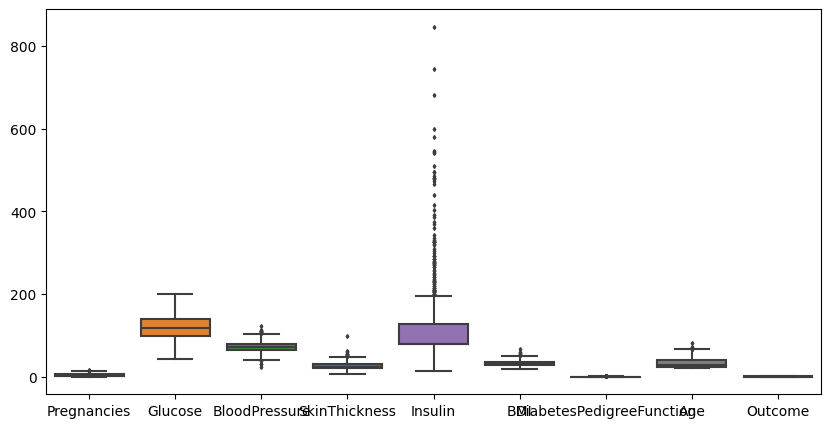

In [65]:
#outlier checking befpre smote
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(data=df, ax=ax, fliersize=2)

In [66]:
#seperate out dependent and independent variables
X=df.drop(columns=['Outcome']) #independent
Y=df['Outcome'] #dependent

In [67]:
#handling imbalance via SMOTE oversampling
from imblearn.over_sampling import SMOTE

In [68]:
smote=SMOTE(random_state=42)

In [69]:
#records before smote
X.shape, Y.shape

((768, 8), (768,))

In [70]:
#doing Smote
X_sm,Y_sm=smote.fit_resample(X,Y)

In [71]:
#records after Smote
X_sm.shape, Y_sm.shape

((1000, 8), (1000,))

In [72]:
#target classes are balanced now
Y_sm.value_counts()

1    500
0    500
Name: Outcome, dtype: int64

In [73]:
#split dataset into train and test again using smotted
X_train, X_test, Y_train, Y_test = train_test_split(X_sm,Y_sm,test_size=0.2,random_state=42)

In [74]:
#Scalling the data
from sklearn.discriminant_analysis import StandardScaler
scaler=StandardScaler()
X_train_Scale=scaler.fit_transform(X_train)
X_test_Scale=scaler.transform(X_test)

In [75]:
#invoking model
dia_log=LogisticRegression(solver='liblinear')

In [76]:
#Doing hyper parameter tuning using griddearchCV
from sklearn.model_selection import GridSearchCV
# Define the hyperparameters to tune
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=dia_log, param_grid=param_grid, cv=5, scoring='precision')
grid_search.fit(X_train_Scale,Y_train)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\LENOVO\AppData\L

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']},
             scoring='precision')

In [77]:
#checking the probabilities for Class 0 and 1
grid_search.predict_proba(X_test_Scale)

array([[0.64039691, 0.35960309],
       [0.85786136, 0.14213864],
       [0.12268867, 0.87731133],
       [0.14256915, 0.85743085],
       [0.73308931, 0.26691069],
       [0.49882401, 0.50117599],
       [0.83508437, 0.16491563],
       [0.89500385, 0.10499615],
       [0.10569283, 0.89430717],
       [0.84023705, 0.15976295],
       [0.21270824, 0.78729176],
       [0.91016036, 0.08983964],
       [0.76682761, 0.23317239],
       [0.13109353, 0.86890647],
       [0.02803952, 0.97196048],
       [0.14982974, 0.85017026],
       [0.30290688, 0.69709312],
       [0.19012759, 0.80987241],
       [0.0202026 , 0.9797974 ],
       [0.08532852, 0.91467148],
       [0.11579828, 0.88420172],
       [0.92629533, 0.07370467],
       [0.4163814 , 0.5836186 ],
       [0.84307197, 0.15692803],
       [0.93572089, 0.06427911],
       [0.04401574, 0.95598426],
       [0.52495924, 0.47504076],
       [0.57668424, 0.42331576],
       [0.05846372, 0.94153628],
       [0.15993707, 0.84006293],
       [0.

In [78]:
#predicting values for test data
y_pred_dia_log=grid_search.predict(X_test_Scale)

In [79]:
#Calculatin metrices
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix,roc_auc_score, roc_curve
print("accuracy_score:",accuracy_score(Y_test,y_pred_dia_log))
print("precision_score:",precision_score(Y_test,y_pred_dia_log))
print("recall_score:",recall_score(Y_test,y_pred_dia_log))
print("f1_score:",f1_score(Y_test,y_pred_dia_log))
print("classification_report:",classification_report(Y_test,y_pred_dia_log))
print("confusion_matrix:",confusion_matrix(Y_test,y_pred_dia_log))

accuracy_score: 0.765
precision_score: 0.7547169811320755
recall_score: 0.7920792079207921
f1_score: 0.7729468599033816
classification_report:               precision    recall  f1-score   support

           0       0.78      0.74      0.76        99
           1       0.75      0.79      0.77       101

    accuracy                           0.77       200
   macro avg       0.77      0.76      0.76       200
weighted avg       0.77      0.77      0.76       200

confusion_matrix: [[73 26]
 [21 80]]


ROC AUC Score: 0.7647264726472648


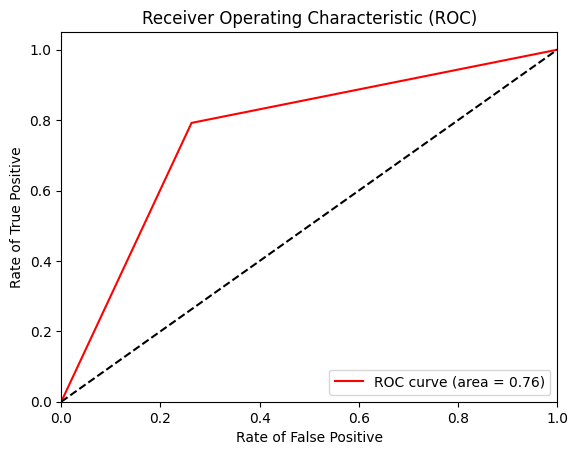

In [80]:
# Calculate ROC AUC
roc_auc = roc_auc_score(Y_test, y_pred_dia_log)
print("ROC AUC Score:", roc_auc)
 
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_dia_log)
plt.plot(fpr, tpr, color= 'red', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Rate of False Positive')
plt.ylabel('Rate of True Positive')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [81]:
# Best hyperparameters
best_params = grid_search.best_params_

# Extracting coefficients and feature names
coefficients = grid_search.best_estimator_.coef_[0]
intercept = grid_search.best_estimator_.intercept_[0]
feature_names = X_train.columns  # Assuming X_train is a DataFrame with column names

# Printing the intercept
print("Intercept:", intercept)

# Printing the coefficient for each feature
for feature, coefficient in zip(feature_names, coefficients):
    print(f"{feature}: {coefficient}")

# Interpretation
print("\nInterpretation:")
for feature, coefficient in zip(feature_names, coefficients):
    if coefficient > 0:
        print(f"An increase in {feature} is associated with an increase in the likelihood of diabetes.")
    elif coefficient < 0:
        print(f"An increase in {feature} is associated with a decrease in the likelihood of diabetes.")
    else:
        print(f"The feature {feature} does not have a significant impact on the likelihood of diabetes.")

Intercept: 0.048432257268343853
Pregnancies: 0.4121466658866623
Glucose: 1.3255296413438458
BloodPressure: -0.20506840162237241
SkinThickness: 0.0
Insulin: -0.2417326367390801
BMI: 0.6753563388144265
DiabetesPedigreeFunction: 0.31316862854919747
Age: 0.18295953822914252

Interpretation:
An increase in Pregnancies is associated with an increase in the likelihood of diabetes.
An increase in Glucose is associated with an increase in the likelihood of diabetes.
An increase in BloodPressure is associated with a decrease in the likelihood of diabetes.
The feature SkinThickness does not have a significant impact on the likelihood of diabetes.
An increase in Insulin is associated with a decrease in the likelihood of diabetes.
An increase in BMI is associated with an increase in the likelihood of diabetes.
An increase in DiabetesPedigreeFunction is associated with an increase in the likelihood of diabetes.
An increase in Age is associated with an increase in the likelihood of diabetes.
